In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities import lambdify
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
sp.init_printing()

In [ ]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
n = sp.Symbol('n', integer = True, nonzero = True)
m = sp.Symbol('m', real = True, positive = True)
t = sp.Symbol('t', real = True, positive = True)
h = sp.Symbol('hbar', real = True, positive = True)
psi = sp.Function('\psi')

x, k, a, psi(x), n, m, h, t

In [ ]:
psi(x).diff(x, 2)

In [ ]:
-k**2 * psi(x)

In [ ]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [ ]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [ ]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol

In [ ]:
plt.hlines(np.arange(1, 10)**2, 0, 1)

In [ ]:
sol = sol.subs(k, n * sp.pi /a)
sol

In [ ]:
sol.lhs, sol.rhs

In [ ]:
sp.Abs(sol.rhs)**2

In [ ]:
sp.integrate((sol.rhs)**2, (x, 0, a))

In [ ]:
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))
sol

In [ ]:
n**2 * sp.pi**2 * h**2 / (2 * m * a**2)

In [ ]:
sp.exp(-sp.I * n**2 * sp.pi**2 * h**2 / (2 * m * a**2) * t / h)

In [ ]:
Psi = sol.rhs * sp.exp(-sp.I * n**2 * sp.pi**2 * h**2 / (2 * m * a**2) * t / h)
Psi

In [ ]:
Psif = lambdify((x, t, n), Psi.subs({h: 1, m: 1, a: 1}))

In [ ]:
Psif(0.3, 2.3, 1)

In [ ]:
xs = np.linspace(0, 1, 1000)

plt.grid(linestyle = "--")

ys = Psif(xs, 0, 1).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 2).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 3).real
plt.plot(xs, ys)

ys = Psif(xs, 0, 4).real
plt.plot(xs, ys)

In [ ]:
n = 3

xs = np.linspace(0, 1, 1000)

fig = plt.figure()

plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)

plot1, = plt.plot([], [])
plot2, = plt.plot([], [])

plt.close()

dt = 0.001

def frame(i):
    t = i * dt

    ys = Psif(xs, t, n)
    ys1 = ys.real
    ys2 = ys.imag

    plot1.set_data(xs, ys1)
    plot2.set_data(xs, ys2)

    return plot1, plot2

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())

In [ ]:
n = 3

xs = np.linspace(0, 1, 1000)

fig = plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 2.5)

plot1, = plt.plot([], [])

plt.close()

dt = 0.001

def frame(i):
    t = i * dt

    ys = Psif(xs, t, n)
    ys1 = np.abs(ys)**2

    plot1.set_data(xs, ys1)

    return plot1,

anim = FuncAnimation(fig, frame, 300, interval = 20, blit = True)
HTML(anim.to_jshtml())

In [ ]:
xs = np.linspace(0, 1, 1000)

fig = plt.figure()

plt.xlim(0, 1)
plt.ylim(0, 4)

plot1, = plt.plot([], [])

plt.close()

dt = 0.001

def frame(i):
    t = i * dt

    ys = (Psif(xs, t, 1) + Psif(xs, t, 2) + Psif(xs, t, 3) + Psif(xs, t, 4)) / (np.sqrt(4))
    ys1 = np.abs(ys)**2

    plot1.set_data(xs, ys1)

    return plot1,

anim = FuncAnimation(fig, frame, 600, interval = 20, blit = True)
HTML(anim.to_jshtml())

In [ ]:
sol

In [ ]:
sol.rhs * sol.rhs * x

In [ ]:
sp.integrate(sol.rhs * sol.rhs * x, (x, 0, a)).simplify()

In [ ]:
sp.integrate(sol.rhs * sol.rhs * x**2, (x, 0, a)).simplify()

$$<p>=?$$

In [147]:
sp.integrate(sol.rhs * -sp.I*h.diff(x) * sol.rhs, (x, 0, a))

$$<p^2>=?$$

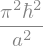

In [148]:
sp.integrate(sol.rhs * (-(h**2) * (-sp.pi**2/a**2)) * sol.rhs, (x, 0, a)).simplify()